In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud

import acquire 
import prepare 
import wrangle

In [2]:
df = acquire.json_to_df()

In [3]:
df.head()

,repo,language,readme_contents
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade..."


In [4]:
df.language.value_counts(normalize=True)

Scala               0.174468
Python              0.172340
JavaScript          0.163830
Jupyter Notebook    0.050000
Java                0.043617
                      ...   
Roff                0.001064
Reason              0.001064
SourcePawn          0.001064
Haxe                0.001064
KiCad               0.001064
Name: language, Length: 62, dtype: float64

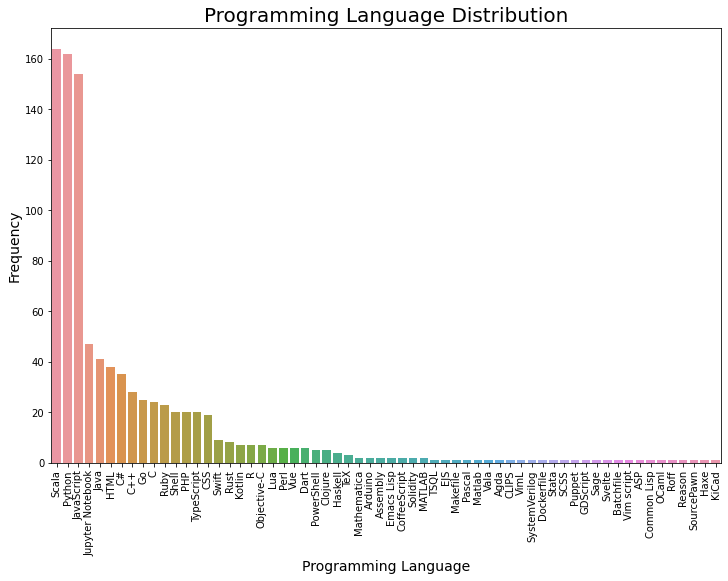

In [5]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="language", data=df,order = df['language'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language', size = 14)
ax.set_ylabel('Frequency', size = 14)
ax.set_title("Programming Language Distribution", size = 20)
plt.show()

In [6]:
df_cleaned = prepare.df_cleaner(df)
df_cleaned.head()

,repo,language,readme_contents,cleaned
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...


In [7]:
df_cleaned['text_length'] = df_cleaned.cleaned.str.split(' ').str.len()

In [22]:
df_cleaned.head()

,repo,language,readme_contents,cleaned,text_length
0,typelevel/cats,Scala,## Cats\n\n![Cats graphic](https://typelevel.o...,scala version continuous contributor open libr...,525
1,nyaadevs/nyaa,Python,# NyaaV2 [![Build Status](https://travis-ci.or...,nyaav2 build setting project python feature us...,493
2,httpcats/http.cat,JavaScript,# http.cat [![Build Status](https://travis-ci...,httpcat build cat website hosted code older ve...,85
3,AlexiaJM/Deep-learning-with-cats,Python,# Deep-learning-with-cats\n\nThis repository i...,repository toy project gain experience buildin...,206
4,sharkdp/bat,Rust,"<p align=""center"">\n <img src=""doc/logo-heade...",cat1 clone syntax highlighting git feature use...,1436


In [11]:
X_train, y_train, X_validate, y_validate, X_test, y_test, df, df_langauges = wrangle.cat_wrangle()

Removed 60 rows with empty Readmes.
Removed 187 rows with Readmes < 10 words long.
Train = 421 rows (56.0%) | Validate = 181 rows (24.0%) | Test = 151 rows (20.0%)


In [24]:
train, validate, test = wrangle.splitter(df)

Train = 421 rows (56.0%) | Validate = 181 rows (24.0%) | Test = 151 rows (20.0%)
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


In [29]:
train.language_group.value_counts(normalize=True)

Other         0.498812
Scala         0.182898
Python        0.168646
JavaScript    0.149644
Name: language_group, dtype: float64

In [30]:
test.language_group.value_counts(normalize=True)

Other         0.443709
Scala         0.205298
JavaScript    0.192053
Python        0.158940
Name: language_group, dtype: float64

In [31]:
validate.language_group.value_counts(normalize=True)

Other         0.408840
Scala         0.220994
Python        0.198895
JavaScript    0.171271
Name: language_group, dtype: float64

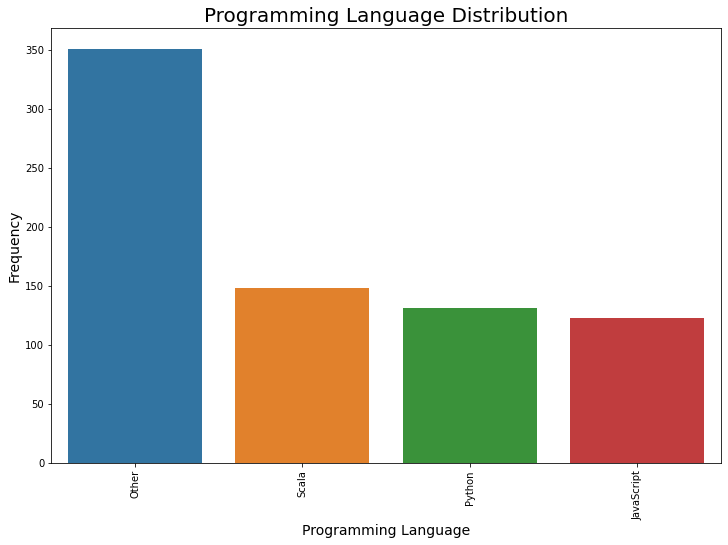

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="language_group", data=df,order = df['language_group'].value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Programming Language', size = 14)
ax.set_ylabel('Frequency', size = 14)
ax.set_title("Programming Language Distribution", size = 20)
plt.show()

In [34]:
text = ''
for i in range(df.shape[0]):
    text = text + df.cleaned.iloc[i]
    
text

'scala version continuous contributor open library provides abstraction functional programming scala programming support functional programming reflected hybrid approach library cat strives provide functional programming abstraction core binary broader goal cat provide foundation ecosystem pure typeful support functional programming scala detail cat motivation name playful shortening word category category need know anything category theory use code project exists thanks people welcome contribution cat would love help see contributor get involved developer looking something start beginner friendly financial financial help sustain community donation directly support office hour maintainer better documentation strategic sponsorship start 950 sponsor appear sponsorship start 420 sponsor appear sponsorship start 180 sponsor appear backer recurring donation appear thankfully accept onetime recurring contribution contributor appear getting available scala well standard jvm relies improved ty

In [53]:
python_df = df[df.language_group == 'Python']

In [54]:
python_text = ''
for i in range(python_df.shape[0]):
    python_text = python_text + python_df.cleaned.iloc[i]
    
python_text

'nyaav2 build setting project python feature used exist make sure use python guide also assumes using linux somewhat capable commandline impossible run nyaa window guide focus code get deeper remember follow pep8 style guideline run devpy lint committing see list may also use devpy fix devpy isort automatically fix issue reported previous pep8 try keep code clean easy understand well running test folder contains test nyaa module webserver run make sure python virtual run devpy test repository setting eas use different python version linux distros offer package right install dependency install pyenv install install python 372 pyenv create virtualenv pyenv install pyenv virtualenv 372 pyenv activate install dependency pip install copy change siteflavor configpy depending instance want setting mysqlmariadb may use sqlite current support project outdated rather enable usemysql flag install latest mariadb following instruction tested version mysql ver 151 distrib x8664 using readline run fo

In [55]:
js_df = df[df.language_group == 'JavaScript']

In [56]:
js_text = ''
for i in range(js_df.shape[0]):
    js_text = js_text + js_df.cleaned.iloc[i]
    
js_text

'httpcat build cat website hosted code older version hosted heroku platform version doe need server side code api behavior provided nginx server interface built react prerendered yarn development yarn yarn build adding new http status code covered welcome create issue cover prepared template make process landscape portrait clone replace information new one export jpg upload folder update creating amazing http status cat creating httpcat status 501 status 102 407 203 image 407 image sponsor consider sponsoring donating via also adopt http cat name chosen catmodule need installed globally use flag install wscat option listen connect version output version auth add basic http authentication header connect specify certificate authority connect cert specify client ssl certificate connect host optional key specify client ssl certificate key connect num maximum number redirects allowed connect default nocolor run without passphrase passphrase specify client ssl certificate key passphrase conn

In [58]:
scala_df = df[df.language_group == 'Scala']

In [60]:
scala_text = ''
for i in range(scala_df.shape[0]):
    scala_text = scala_text + scala_df.cleaned.iloc[i]
    
scala_text

'scala version continuous contributor open library provides abstraction functional programming scala programming support functional programming reflected hybrid approach library cat strives provide functional programming abstraction core binary broader goal cat provide foundation ecosystem pure typeful support functional programming scala detail cat motivation name playful shortening word category category need know anything category theory use code project exists thanks people welcome contribution cat would love help see contributor get involved developer looking something start beginner friendly financial financial help sustain community donation directly support office hour maintainer better documentation strategic sponsorship start 950 sponsor appear sponsorship start 420 sponsor appear sponsorship start 180 sponsor appear backer recurring donation appear thankfully accept onetime recurring contribution contributor appear getting available scala well standard jvm relies improved ty

In [61]:
other_df = df[df.language_group == 'Other']

In [62]:
other_text = ''
for i in range(other_df.shape[0]):
    other_text = other_text + other_df.cleaned.iloc[i]
    
other_text

'cat1 clone syntax highlighting git feature use installation customization project goal special thank biggest app selling enterprise customer line single signon minute instead syntax support syntax highlighting large number programming highlighting git communicates git show modification respect left side integration show nonprintable use option show highlight character automatic default bat pipe output pager output large one would rather bat work like cat time never page output set option either command line configuration intend alias cat bat shell configuration use alias cat bat preserve default file pager set still use bat concatenate file bat detects terminal pipe another process file bat act dropin replacement cat fall back printing plain file content regardless pager option single file bat multiple file bat stdin determine syntax automatically note highlighting work syntax determined first line shebang curl stdin specify language yaml2json travisyml jsonpp bat highlight nonprintab

In [65]:
# our 4 languages
languages = {
    'Python': python_text ,
    'Scala': scala_text ,
    'Javascript': js_text ,
    'Other': other_text
}
print(languages)

{'Python': 'nyaav2 build setting project python feature used exist make sure use python guide also assumes using linux somewhat capable commandline impossible run nyaa window guide focus code get deeper remember follow pep8 style guideline run devpy lint committing see list may also use devpy fix devpy isort automatically fix issue reported previous pep8 try keep code clean easy understand well running test folder contains test nyaa module webserver run make sure python virtual run devpy test repository setting eas use different python version linux distros offer package right install dependency install pyenv install install python 372 pyenv create virtualenv pyenv install pyenv virtualenv 372 pyenv activate install dependency pip install copy change siteflavor configpy depending instance want setting mysqlmariadb may use sqlite current support project outdated rather enable usemysql flag install latest mariadb following instruction tested version mysql ver 151 distrib x8664 using read

In [68]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for language in languages.values() if word in language])
    return len(languages) / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(languages.values()).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(20))

,idf
word,
nyaav2,4.0
beanie,4.0
gamified,4.0
york,4.0
dec28,4.0
reigning,4.0
cnbc,4.0
epitomizing,4.0
fortune,4.0


In [70]:
tfs = []

# We'll caclulate the tf-idf value for every word across every document

# Start by iterating over all the documents
for language, text in languages.items():
    # We'll make a data frame that contains the tf for every word in every document
    df = (pd.Series(text.split())
          .value_counts()
          .reset_index()
          .set_axis(['word', 'raw_count'], axis=1, inplace=False)
          .assign(tf=lambda df: df.raw_count / df.shape[0])
          .drop(columns='raw_count')
          .assign(language=language))
    # Then add that data frame to our list
    tfs.append(df)

# We'll then concatenate all the tf values together.
(pd.concat(tfs)
 # calculate the idf value for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # then use the if and idf values to calculate tf-idf 
 .assign(tf_idf=lambda df: df.idf * df.tf)
 .drop(columns=['tf', 'idf'])
 .sort_values(by='tf_idf', ascending=False))

,word,language,tf_idf
3,scala,Scala,0.099721
28,scalaz,Scala,0.078801
0,cat,Javascript,0.064926
0,cat,Python,0.064346
0,cat,Other,0.061923
...,...,...,...
11393,dem,Other,0.000084
7109,tem,Other,0.000084
11390,govern,Other,0.000084
5435,algo,Other,0.000084


In [71]:
# We'll then concatenate all the tf values together.
(pd.concat(tfs)
 # calculate the idf value for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # then use the if and idf values to calculate tf-idf 
 .assign(tf_idf=lambda df: df.idf * df.tf)
 .drop(columns=['tf', 'idf'])
 .sort_values(by='tf_idf', ascending=False)
 .pipe(lambda df: pd.crosstab(df.language, df.word, values=df.tf_idf, aggfunc=lambda x: x))
 .fillna(0))

word,&#9;,000,0000,000001000,000004,00001,00005000,00008081,0001,00013,...,ztf,ztfdr1,ztfsrclcdr1,zuffi,zurb,zxvf,zxvg,zynga,zzish,zzishs
language,,,,,,,,,,,,,,,,,,,,,
Javascript,0.000958,0.000000,0.000240,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001917,0.000958
Other,0.022487,0.002433,0.000252,0.000000,0.000000,0.00000,0.000000,0.001007,0.000671,0.000336,...,0.000000,0.000000,0.000000,0.000000,0.000336,0.000000,0.000000,0.000336,0.000000,0.000000
Python,0.023995,0.000170,0.000000,0.000679,0.000679,0.00034,0.000679,0.000000,0.000000,0.000000,...,0.001358,0.001358,0.000679,0.000679,0.000000,0.001358,0.001358,0.000000,0.000000,0.000000
Scala,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(languages.values())
tfidfs

<4x19449 sparse matrix of type '<class 'numpy.float64'>'
	with 27715 stored elements in Compressed Sparse Row format>

In [73]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

,000,0000,000001000,000004,00001,00005000,00008081,0001,00013,00015,...,ztf,ztfdr1,ztfsrclcdr1,zuffi,zurb,zxvf,zxvg,zynga,zzish,zzishs
0,0.001375,0.000000,0.001744,0.001744,0.001744,0.001744,0.00000,0.000000,0.000000,0.000000,...,0.003488,0.003488,0.001744,0.001744,0.000000,0.003488,0.003488,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.002085,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005289,0.002644
3,0.018903,0.001955,0.000000,0.000000,0.000000,0.000000,0.00248,0.003307,0.000827,0.000827,...,0.000000,0.000000,0.000000,0.000000,0.000827,0.000000,0.000000,0.000827,0.000000,0.000000


In [77]:
df.head()

,word,tf,language
0,cat,0.061923,Other
1,use,0.044135,Other
2,file,0.040779,Other
3,image,0.037422,Other
4,run,0.031045,Other


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df)
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'text'